In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from pprint import pprint

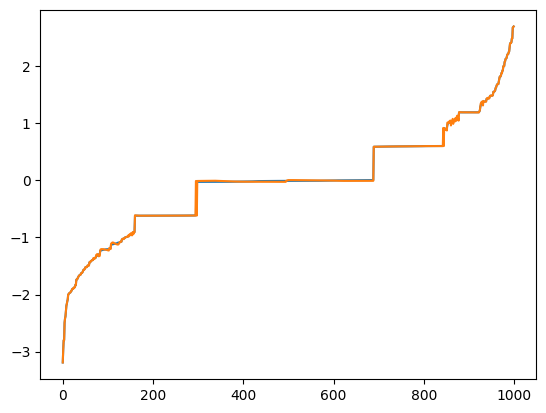

In [2]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 8
dt = 0.1
t = np.arange(0,5000,dt)
K = 3.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 200
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
plt.plot(np.sort(avg_dtheta[-1]))
plt.plot((avg_dtheta[-1]))

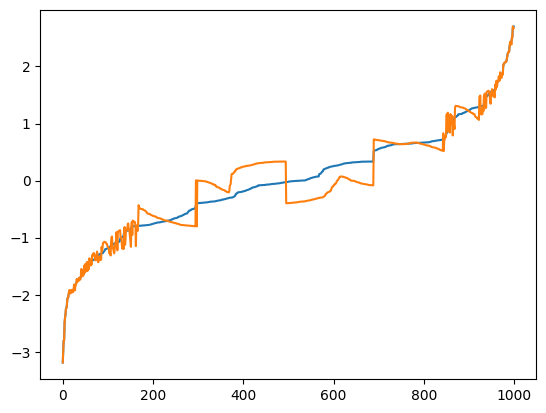

In [46]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 8
dt = 0.01
t = np.arange(0,1000,dt)
K = 3.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta[-1],p_dtheta= dtheta[-1],p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 2000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
plt.plot(np.sort(avg_dtheta[-1]))
plt.plot((avg_dtheta[-1]))

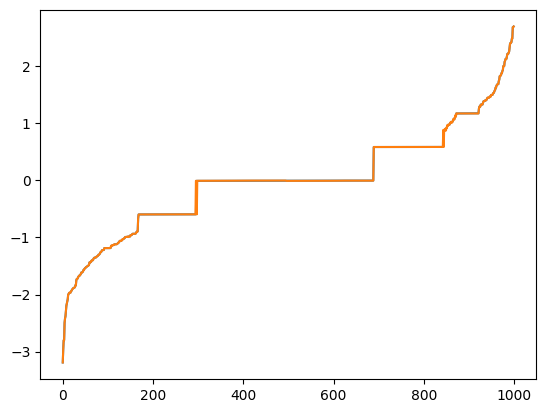

In [53]:
sum_time = 20000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
plt.plot(np.sort(avg_dtheta[-1]))
plt.plot((avg_dtheta[-1]))

In [48]:
Z = np.sum(np.exp(1j*theta),axis=1)/N

In [49]:
signal = Z[-5000:]

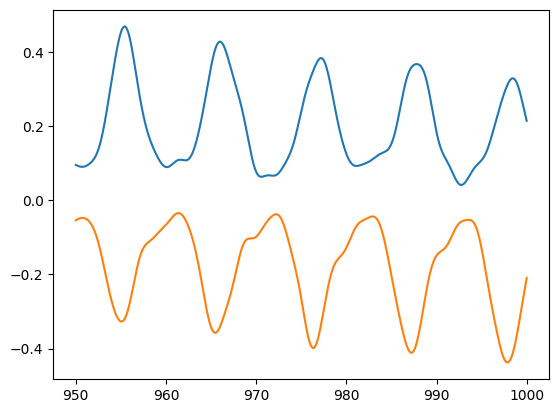

In [50]:
Fs = 5000
T = 1/dt

# time = np.linspace(0, , Fs)
time = t[-Fs:]
plt.plot(time, signal.real)
plt.plot(time, signal.imag)
plt.show()

In [72]:
peak = [np.abs(i) for i in yf]
peak_index = np.argsort(peak)

In [81]:
yf = np.fft.fft(signal)
xf = np.fft.fftfreq(N, dt)
amplitude = abs(yf)*(2/len(yf))
amplitude_index = np.argsort(amplitude)[::-1]

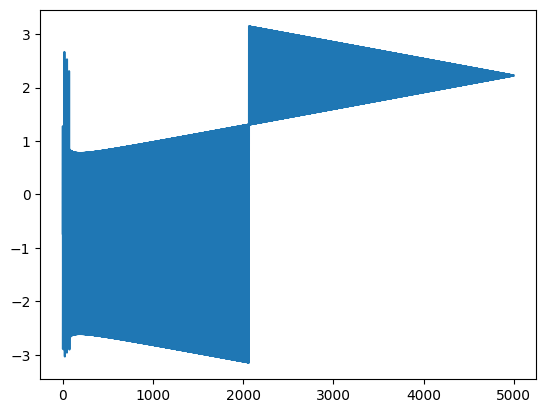

In [85]:
plt.plot(np.angle(yf)[amplitude_index])

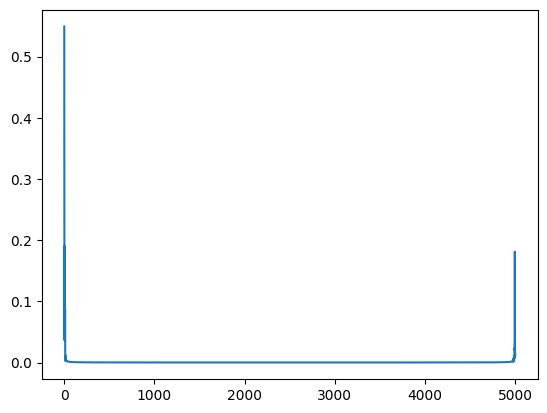

In [83]:
def Ifft_to_function(signal):
    yf = np.fft.fft(signal)
    yf = np.fft.fftshift(yf)
    xf = np.fft.fftfreq(N, dt)
    xf = np.fft.fftshift(xf)

    amplitude = abs(yf)*(2/len(yf))
    amplitude_index = np.argsort(amplitude)[::-1]
    for 

(-1.5, 1.5)

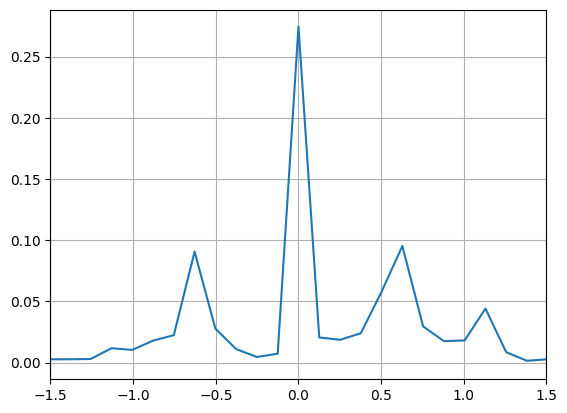

In [52]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
# number of signal points
N = 5000
# sample spacing
T = dt
x = np.linspace(0.0, N*T, N, endpoint=False)
y = signal
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf*2*np.pi, 1.0/N * np.abs(yplot))
plt.grid()
plt.xlim(-1.5,1.5)

In [69]:
yf

array([1023.66032863-914.93382811j,   52.81518302 -87.72927934j,
         13.72826218 -91.64742596j, ...,   54.37949726  +6.44252627j,
        -16.552374   +15.36623147j,  -31.8989094  +16.45853406j])

In [64]:
y = np.fft.ifft(yf)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


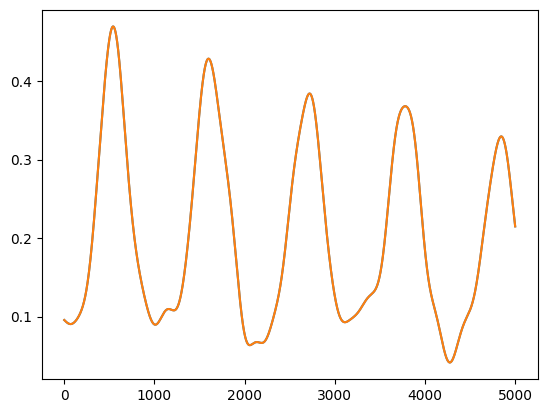

In [68]:
plt.plot(y)
plt.plot(signal.real)

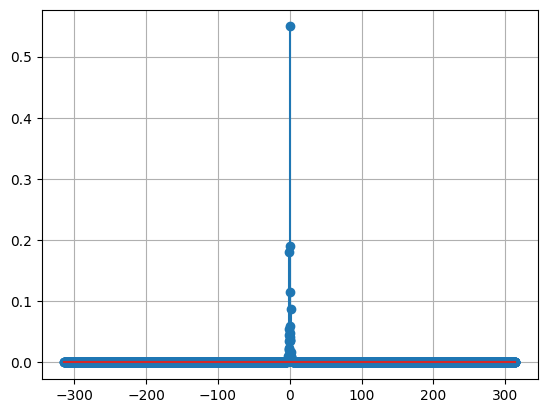

In [63]:
s_fft = np.fft.fft(signal) # 추후 IFFT를 위해 abs를 취하지 않은 값을 저장한다.
amplitude = abs(s_fft)*(2/len(s_fft)) # 2/len(s)을 곱해줘서 원래의 amp를 구한다.
frequency = np.fft.fftfreq(len(s_fft), dt)

# plt.xlim(0, 0.8)
plt.stem(frequency*(2*np.pi), amplitude)
plt.grid(True)
plt.show()

In [29]:
fft_freq = frequency.copy()
peak_index = amplitude[:int(len(amplitude)/2)].argsort()[-1]
peak_freq = fft_freq[peak_index]

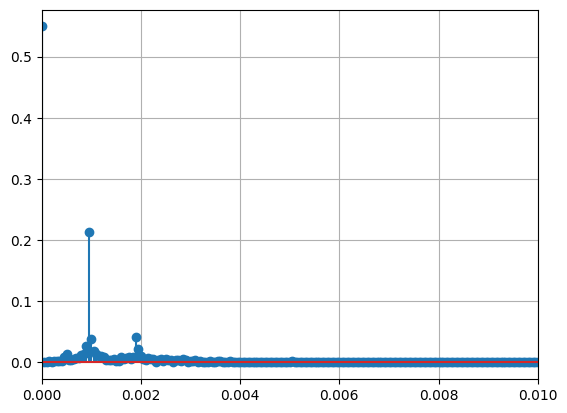

In [30]:
s_fft = np.fft.fft(signal) # 추후 IFFT를 위해 abs를 취하지 않은 값을 저장한다.
amplitude = abs(s_fft)*(2/len(s_fft)) # 2/len(s)을 곱해줘서 원래의 amp를 구한다.
frequency = np.fft.fftfreq(len(s_fft), T)

plt.xlim(0, 0.01)
plt.stem(frequency, amplitude)
plt.grid(True)
plt.show()

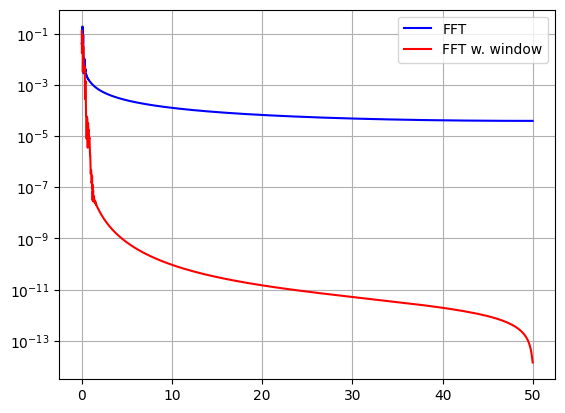

In [62]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 5000
# sample spacing
T = dt
x = np.linspace(0.0, N*T, N, endpoint=False)
y = signal
yf = fft(y)
from scipy.signal import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
# plt.xlim(0,0.1)
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

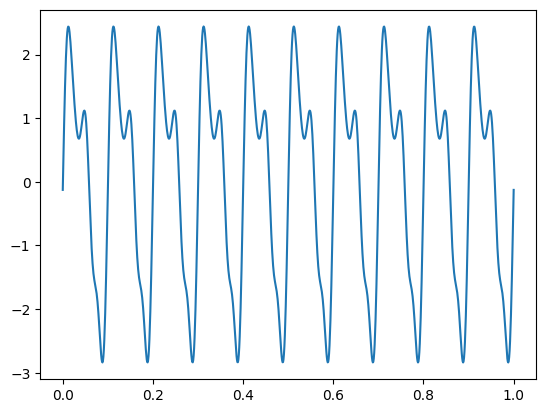

In [111]:
Fs = 1000
T = 1/Fs
end_time = 1
time = np.linspace(0, end_time, Fs)
amp = [2, 1, 0.5, 0.2]
freq = [10, 20, 30, 40]
phase = np.deg2rad([-10, 20, -30, 40])

signal_1 = amp[0]*np.sin(freq[0]*2*np.pi*time+phase[0])
signal_2 = amp[1]*np.sin(freq[1]*2*np.pi*time+phase[1])
signal_3 = amp[2]*np.sin(freq[2]*2*np.pi*time+phase[2])
signal_4 = amp[3]*np.sin(freq[3]*2*np.pi*time+phase[3])

signal = signal_1 + signal_2 + signal_3 + signal_4

plt.plot(time, signal)
plt.show()

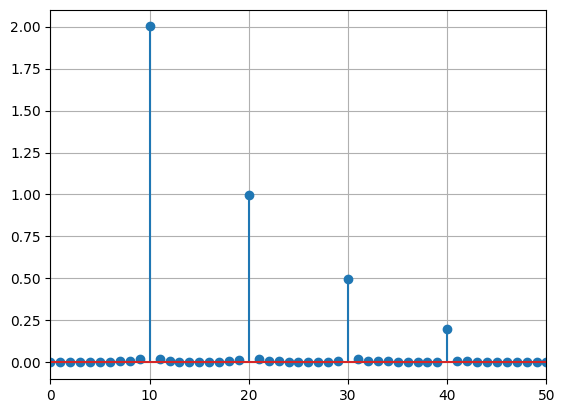

In [112]:
s_fft = np.fft.fft(signal) # 추후 IFFT를 위해 abs를 취하지 않은 값을 저장한다.
amplitude = abs(s_fft)*(2/len(s_fft)) # 2/len(s)을 곱해줘서 원래의 amp를 구한다.
frequency = np.fft.fftfreq(len(s_fft), T)

plt.xlim(0, 50)
plt.stem(frequency, amplitude)
plt.grid(True)
plt.show()


In [113]:
idx = np.argsort(amplitude)[::-1]

In [ ]:
y = fft(x);
z = fftshift(y);

In [114]:
angle = np.angle(s_fft)
angle[amplitude<0] = 0

In [116]:
print(np.rad2deg(angle[idx][:8]))

[  98.18399939  -98.18399939   66.3715705   -66.3715705  -114.79866304
  114.79866304  -41.95703954   41.95703954]
